# Modelagem

### Importação

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import  train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

sns.set_theme()

### Carregando Dataset

In [2]:
# Carregar dados
data = pd.read_csv("../data/cleaned.csv", parse_dates=["data"])

# Criar features temporais 
data["data"] = pd.to_datetime(data['data'])
data["dia_semana"] = data['data'].dt.dayofweek 
data["fim_de_semana"] = data['dia_semana'].isin([5,6]).astype(int)

# Definir target e features 
num_cols = [
    "regularidade", "duracao", "sono_leve_perc", "sono_profundo_perc", "REM_perc",
    "tempo_acordado", "vezes_acordado", "dia_semana", "fim_de_semana"
]

# Features
X = data[num_cols] 
# Target
y = data["pontuacao"] 

### Train_Test_Split
Optei por utilizar um test size de 25%, pois foi onde percebi que os modelos atingiram as melhores métricas.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, 
)

### Modelos

Estarei comparando o desempenho de 5 Modelos. Sendo eles:

#### 1 - Lasso

O Lasso é um modelo de regressão linear regularizado que adiciona uma penalidade baseada na soma dos valores absolutos dos coeficientes. Ele é usado para prever variáveis contínuas e é particularmente útil para seleção de features, pois pode reduzir coeficientes irrelevantes a zero, efetivamente eliminando variáveis desnecessárias.

##### Como Funciona:

- Baseado na regressão linear, mas adiciona uma regularização L1 (penalidade absoluta) para evitar overfitting.
- O algoritmo minimiza a função de perda (geralmente o erro quadrático médio) mais o termo de regularização.
- O parâmetro de regularização (alpha ou λ) controla a força da penalidade: valores maiores levam a mais coeficientes zerados.

##### Vantagens:

- Realiza seleção automática de features, tornando o modelo mais interpretável e eficiente em datasets com muitas variáveis.
- Reduz overfitting em dados de alta dimensionalidade.
- Útil para problemas onde há multicolinearidade (correlação entre features).

##### Limitações:

Pode ser instável se as features forem altamente correlacionadas (pode selecionar uma e ignorar as outras).
Não lida bem com dados não lineares sem transformações.
A escolha de λ requer validação cruzada.

In [ ]:
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Métricas de avaliação
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mape_lasso = mean_absolute_percentage_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)


#### 2 - Ridge

O Ridge é outro modelo de regressão linear regularizado, mas usa uma penalidade L2 (soma dos quadrados dos coeficientes). Ele encolhe os coeficientes para valores menores, mas raramente os zera, ajudando a lidar com multicolinearidade.

##### Como Funciona:

- Similar ao Lasso, minimiza o erro quadrático mais o termo de regularização L2.
- O parâmetro λ controla a penalidade: maior λ encolhe mais os coeficientes.
- É útil quando todas as features são potencialmente relevantes, mas precisam ser estabilizadas.


##### Vantagens:

- Lida bem com multicolinearidade, estabilizando os coeficientes.
- Reduz variância sem eliminar features, o que é bom para datasets com features correlacionadas.
- Mais estável que o Lasso em cenários com correlações altas.

##### Limitações:

- Não realiza seleção de features (coeficientes raramente chegam a zero).
Requer normalização das features para que a penalidade seja justa.
- Não é ideal para dados esparsos ou de alta dimensionalidade sem seleção.

In [5]:
ridge_model = Ridge(random_state=42)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Métricas de avaliação
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

#### 3 - Hist Gradient Boosting Regressor

É uma implementação eficiente do Gradient Boosting para regressão, baseada em histogramas, disponível na biblioteca scikit-learn. Ele constrói um ensemble de árvores de decisão fracas, otimizando para velocidade e escalabilidade em grandes datasets.

##### Vantagens:
- Muito eficiente em datasets grandes devido ao uso de histogramas (mais rápido que GradientBoosting padrão).
- Lida bem com dados faltantes e não requer muita pré-processamento.
- Alta precisão em problemas não lineares e com interações complexas.

##### Limitações:
- Pode overfit se não tunado corretamente (use validação cruzada).
- Menos interpretável que modelos lineares.
- Consome mais memória em datasets muito grandes.

In [6]:
hgb_model = HistGradientBoostingRegressor(random_state=42)

# Treinar melhor modelo
hgb_model.fit(X_train, y_train)
y_pred_hgb = hgb_model.predict(X_test)

# Métricas de avaliação
mae_hgb = mean_absolute_error(y_test, y_pred_hgb)
mse_hgb = mean_squared_error(y_test, y_pred_hgb)
mape_hgb = mean_absolute_percentage_error(y_test, y_pred_hgb)
rmse_hgb = np.sqrt(mse_hgb)
r2_hgb = r2_score(y_test, y_pred_hgb)


#### 4 - Linear Model

O modelo linear é o mais básico para regressão, assumindo uma relação linear entre as features e a variável alvo. Ele estima coeficientes para minimizar a diferença entre previsões e valores reais.

##### Como Funciona:

- Usa mínimos quadrados ordinários (OLS) para encontrar os melhores coeficientes.
- Pode ser simples (uma feature) ou múltipla (várias features).
- Extensões incluem regularização (como Lasso e Ridge).

##### Vantagens:

- Simples, rápido e altamente interpretável (coeficientes mostram impacto de cada feature).
- Bom para relações lineares e como baseline para comparações.
- Fácil de implementar e entender.

##### Limitações:

- Assume linearidade, o que nem sempre é verdade (falha em dados não lineares).
- Sensível a outliers e multicolinearidade.
- Pode underfit em problemas complexos.

In [7]:
linear_model = LinearRegression()

# Treinar melhor modelo
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Métricas de avaliação
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mape_linear = mean_absolute_percentage_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

#### 5 - Random Forest Regressor

É um ensemble de árvores de decisão para regressão, onde múltiplas árvores são treinadas em subconjuntos aleatórios dos dados e features, e as previsões são agregadas (média).

##### Como Funciona:

- Usa bagging: cada árvore é treinada em um bootstrap sample.
- Randomiza features em cada split para reduzir correlação entre árvores.
- Parâmetros chave: n_estimators (número de árvores), max_depth, min_samples_split.

##### Vantagens:

- Robusto a overfitting devido ao ensemble.
- Lida bem com dados não lineares, faltantes e de alta dimensionalidade.
- Fornece importância de features e é paralelizável.

##### Limitações:

- Menos interpretável que uma única árvore.
- Pode ser computacionalmente intensivo em datasets muito grandes.
- Não extrapola bem além dos dados de treinamento.

In [8]:
random_forest_model = RandomForestRegressor(random_state=42)
# Treinar melhor modelo
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

# Métricas de avaliação
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)


### Comparação de Modelos
Para determinar qual modelo irei prosseguir, utilizarei 5 métricas de Avalição.
Sendo elas:

#### 1. R² (Coeficiente de Determinação)


O R² mede a proporção da variância nos dados dependentes que é explicada pelo modelo. Ele indica o quão bem o modelo se ajusta aos dados.
##### Interpretação
- R² varia de 0 a 1 (ou pode ser negativo em modelos muito ruins).
- R² = 1: O modelo explica toda a variância (ajuste perfeito).
- R² = 0: O modelo não explica nenhuma variância (equivalente a prever a média).
- Um R² de 0.8 significa que 80% da variância nos dados é explicada pelo modelo.
- Valores negativos indicam que o modelo é pior que a média dos dados.
---

#### 2. MAE (Mean Absolute Error - Erro Absoluto Médio)

O MAE mede a média dos erros absolutos entre os valores previstos pelo modelo e os valores reais. Ele quantifica a magnitude média dos erros sem considerar sua direção (positivo ou negativo).

##### Interpretação
- O MAE é expresso na mesma unidade dos dados originais, o que facilita a interpretação.
- Um MAE menor indica que o modelo faz previsões mais precisas.

--- 

#### 3. MAPE (Mean Absolute Percentage Error - Erro Percentual Absoluto Médio)

O MAPE mede o erro absoluto médio em termos percentuais, expressando o erro como uma porcentagem do valor real.

##### Interpretação
- O MAPE é expresso como uma porcentagem, o que o torna fácil de interpretar em contextos onde proporções relativas são importantes.
- Um MAPE de 10% significa que, em média, as previsões desviam 10% dos valores reais.

---

#### 4. MSE (Mean Squared Error - Erro Quadrático Médio)

O MSE calcula a média dos erros ao quadrado entre os valores reais e previstos. Ele penaliza erros maiores de forma mais severa.

##### Interpretação
- O MSE está na unidade dos dados ao quadrado (por exemplo, se os dados são em metros, o MSE está em metros²).
- Um MSE menor indica um modelo mais preciso.
- É útil para comparar modelos, mas não é tão intuitivo quanto o MAE devido à escala ao quadrado.

---

#### 5. RMSE (Root Mean Squared Error - Raiz do Erro Quadrático Médio)

O RMSE é a raiz quadrada do MSE, trazendo a métrica de volta à mesma unidade dos dados originais.

##### Interpretação
- Como o MAE, o RMSE está na mesma unidade dos dados, facilitando a interpretação.
- Um RMSE menor indica melhor desempenho do modelo.
- Penaliza erros grandes mais fortemente que o MAE, mas menos que o MSE.

### Tabela Modelos - Métricas

In [17]:
metricas_models = [
    ["Lasso", r2_lasso, mae_lasso, mape_lasso, mse_lasso, rmse_lasso],
    [ "Ridge", r2_ridge, mae_ridge, mape_ridge, mse_ridge, rmse_ridge],
    ["HistGradientBoostingRegresor", r2_hgb, mae_hgb, mape_hgb, mse_hgb, rmse_hgb],
    ["Linear Model", r2_linear, mae_linear, mape_linear, mse_linear, rmse_linear],
    ["Random Forest", r2_rf, mae_rf, mape_rf, mse_rf, rmse_rf]

]

In [18]:
from tabulate import tabulate

print(tabulate(metricas_models, headers=["Modelo", "R2", "MAE", "MAPE", "MSE", "RMSE"], floatfmt=".4f"))

Modelo                            R2     MAE    MAPE      MSE    RMSE
----------------------------  ------  ------  ------  -------  ------
Lasso                         0.6958  3.7303  4.7862  20.0897  4.4821
Ridge                         0.7094  3.5888  0.0463  19.1969  4.3814
HistGradientBoostingRegresor  0.7733  3.4515  0.0448  14.9739  3.8696
Linear Model                  0.7021  3.6336  0.0470  19.6768  4.4359
Random Forest                 0.6256  4.0342  0.0532  24.7270  4.9726


## Visualização Gráfica

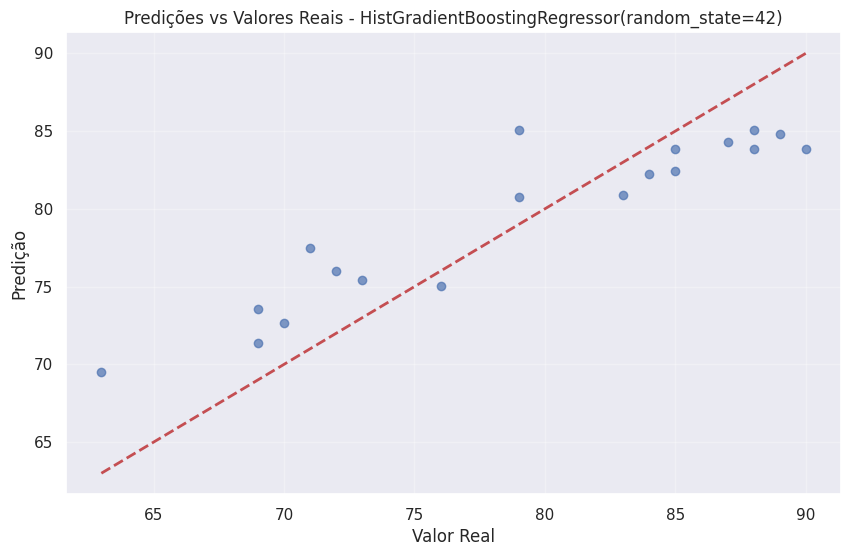

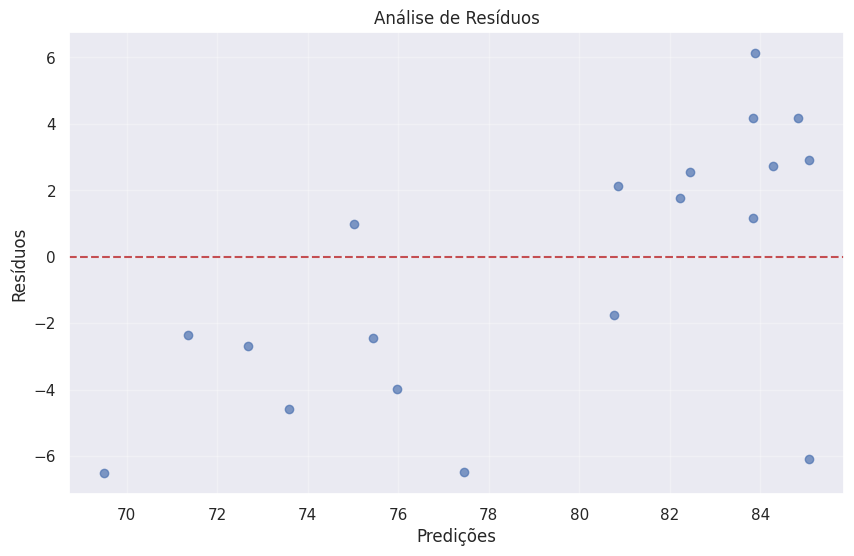

In [11]:
# Gráfico de dispersão: Previsões vs Valores Reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_hgb, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Predição')
plt.title(f'Predições vs Valores Reais - {hgb_model}')
plt.grid(True, alpha=0.3)
plt.show()

# Gráfico de resíduos
residuals = y_test - y_pred_hgb
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_hgb, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predições')
plt.ylabel('Resíduos')
plt.title('Análise de Resíduos')
plt.grid(True, alpha=0.3)
plt.show()

### Importância das Variáveis

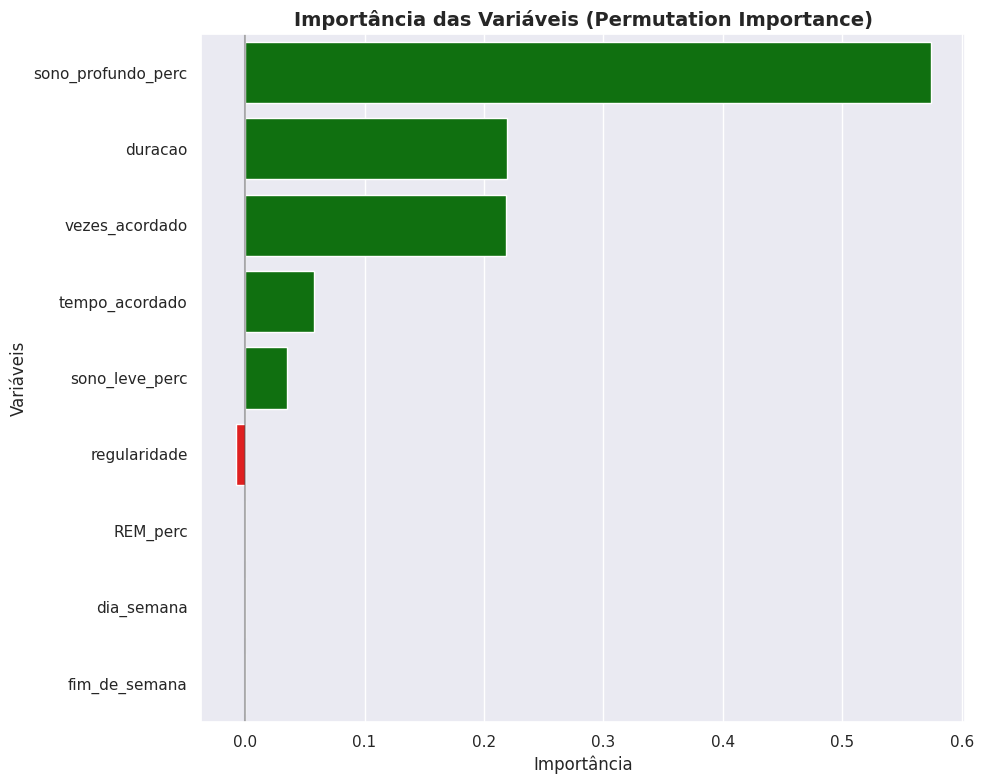

In [12]:
from sklearn.inspection import permutation_importance

# Calcula permutation importance
result = permutation_importance(
    hgb_model, X_test, y_test, n_repeats=10, random_state=42
)


importances = result.importances_mean

# Cria DataFrame com importâncias
feat_imp = pd.DataFrame({
    "feature": num_cols,
    "importance": importances
}).sort_values("importance", key=abs, ascending=False)


# Cria o gráfico
plt.figure(figsize=(10, 8))
colors = ['red' if x < 0 else 'green' for x in feat_imp['importance']]

sns.barplot(data=feat_imp, x="importance", y="feature", hue="feature",legend=False, palette=colors)
plt.title("Importância das Variáveis (Permutation Importance)", fontsize=14, fontweight='bold')
plt.xlabel("Importância", fontsize=12)
plt.ylabel("Variáveis", fontsize=12)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

### Inserindo novos dados

In [ ]:
def predict_sono_quality(model, features_dict):
    """Função para fazer previsões com novo dados"""
    
    # Converter para DataFrame
    input_df = pd.DataFrame([features_dict])
    
    # Fazer previsão
    prediction = model.predict(input_df)[0]
    
    print(f"Previsão de pontuação de sono: {prediction:.1f}/100")
    return prediction

In [14]:
novo = {
    "regularidade": 84, 
    "duracao": 353, 
    "sono_leve_perc": 70, 
    "sono_profundo_perc": 16, 
    "REM_perc": 14,
    "tempo_acordado": 10, 
    "vezes_acordado": 3, 
    "dia_semana": 1, 
    "fim_de_semana": 1
}

In [15]:
predict_sono_quality(hgb_model, novo)

Previsão de pontuação de sono: 78.9/100


np.float64(78.90532016956223)